## Homework
For this project I was asked to work on the Kaggle competition “house prices”. More on the competition here:

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels 

For starters the main purpose of this project is to be able to test different models and come up with a solution to the problem after iterating though various models and better understanding the data, the problem and which model better fits, explains and predicts the data. In order to work in a concise and orderly manner I will follow the suggested agenda below:
* Data Management
    * Bring in Data
    * Manipulate and Administer Missing Values
    * Explore the Data and Transform it as Necessary
* Model Building and Interpretation
    * Build and interpret different models
    * Output a file with all the predictions
    
    
This is a very general and wholistic overview of what this kernel will walk you through. If you have any comments or questions, please feel free to reach out or comment below.
BIG Shout-Out to the following kernel which made my life easier and this kernel possible:
*https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python
*https://www.kaggle.com/meikegw/filling-up-missing-values
*https://www.kaggle.com/julepe7993/starting-your-ml-project/edit?unified=1
*https://www.kaggle.com/apapiu/regularized-linear-models
*https://www.kaggle.com/tannercarbonati/detailed-data-analysis-ensemble-modeling
*https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard/notebook



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scipy.stats import norm, skew
import warnings
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
color = sns.color_palette()
sns.set_style('darkgrid')
warnings.filterwarnings('ignore')
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore warnings from SNS and SKLEARN
pd.set_option('display.float_format', lambda x: '{:.3f}'.format(x))
from subprocess import check_output

In [2]:
print(check_output(["ls", "/Users/J.Alvarez/OneDrive - BYU Office 365/Econ 213R/Data"]).decode("utf8"))

database.sqlite
european-soccer-data.ipynb
test.csv
train.csv



In [3]:
train = pd.read_csv("/Users/J.Alvarez/OneDrive - BYU Office 365/Econ 213R/Data/train.csv")
test = pd.read_csv("/Users/J.Alvarez/OneDrive - BYU Office 365/Econ 213R/Data/test.csv")

In [4]:
#Save the 'Id' column
train_ID = train['Id']
test_ID = test['Id']

#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

In [5]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.000,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.000,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.000,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.000,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.000,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.000,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.000,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.000,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.000,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.000,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
train_len=len(train)
train_len

1460

In [8]:
houseprice=pd.concat(objs=[train, test], axis=0).reset_index(drop=True)

In [9]:
len(houseprice)

2919

In [10]:
houseprice.head()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BldgType,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,...,SaleType,ScreenPorch,Street,TotRmsAbvGrd,TotalBsmtSF,Utilities,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold
0,856,854,0,NaN,3,1Fam,TA,No,706.000,0.000,...,WD,0,Pave,8,856.000,AllPub,0,2003,2003,2008
1,1262,0,0,NaN,3,1Fam,TA,Gd,978.000,0.000,...,WD,0,Pave,6,1262.000,AllPub,298,1976,1976,2007
2,920,866,0,NaN,3,1Fam,TA,Mn,486.000,0.000,...,WD,0,Pave,6,920.000,AllPub,0,2001,2002,2008
3,961,756,0,NaN,3,1Fam,Gd,No,216.000,0.000,...,WD,0,Pave,7,756.000,AllPub,0,1915,1970,2006
4,1145,1053,0,NaN,4,1Fam,TA,Av,655.000,0.000,...,WD,0,Pave,9,1145.000,AllPub,192,2000,2000,2008


## Data Exploration:

This will probably be a pretty heavy part of the kernel. 

Having a good and reliable dataset will allow for better predictions. As I looked through kernels to get an idea of where to start or what to do, I decide to start by filling the missing values. Note that at this point I merged both of the train and test in order to deal with the missing values at the same time. Before I start filling those, I want to get an idea of he percentage, and what those values are. The following graph tells me which values are missing that I could potentially fill. What jumps to my eyes is how some of the variables are missing a lot of values. There are 2 options I am considering. My first approach will be to go through each one of the variables and as I visit each one, look at the possible values they could take and see if there is a data misrepresentation problem or actual data that is missing. Depending on the situation I will either fill those with the most frequent value or try to use other variables to determine what values will be more appropriate. This approach will be taken for those variables that have a considerable amount of data missing and will be taken case by case.

In [11]:
missing_data_exploration = houseprice

In [12]:
all_missing_data = (missing_data_exploration.isnull().sum() / len(missing_data_exploration)) * 100
all_missing_data = all_missing_data.drop(all_missing_data[all_missing_data == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_missing_data})
missing_data.head(20)

,Missing Ratio
PoolQC,99.657
MiscFeature,96.403
Alley,93.217
Fence,80.439
SalePrice,49.983
FireplaceQu,48.647
LotFrontage,16.650
GarageQual,5.447
GarageCond,5.447
GarageFinish,5.447


Text(0.5,1,'Percent missing data by feature')

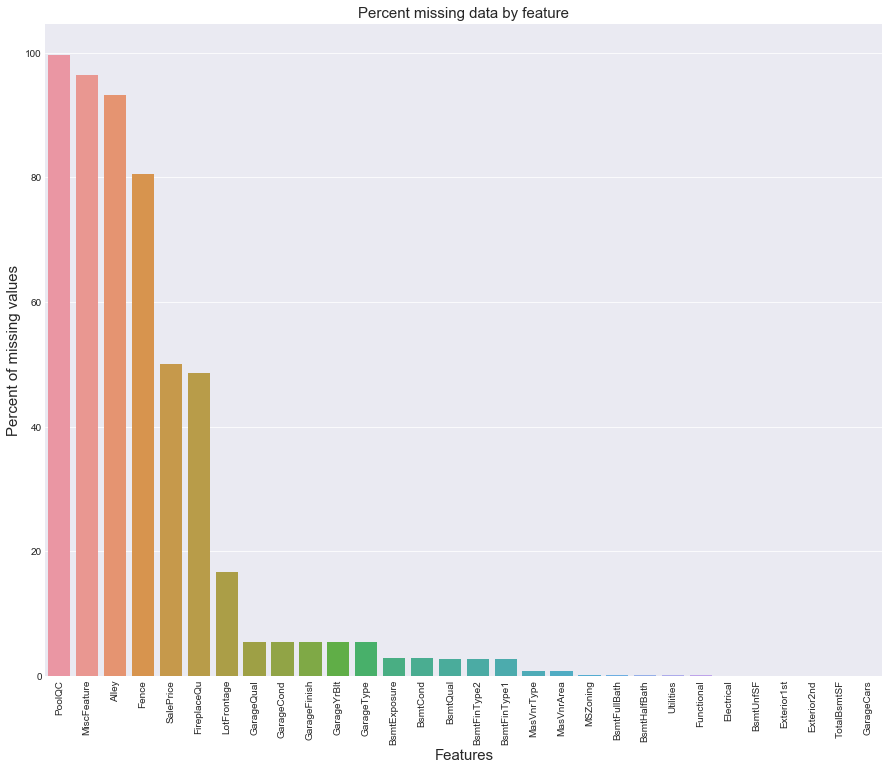

In [13]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=all_missing_data.index, y=all_missing_data)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

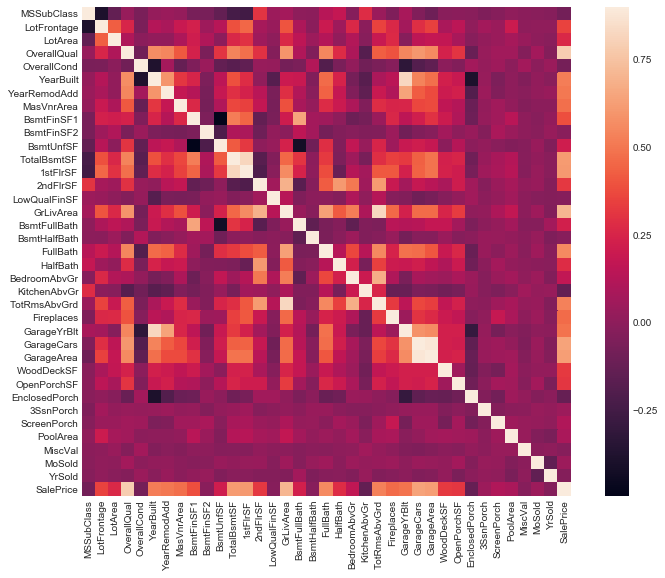

In [14]:
corrmat = train.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, square=True)

In [15]:
def show_missing():
    missing = houseprice.columns[houseprice.isnull().any()].tolist()
    return missing

In [16]:
houseprice[show_missing()].isnull().sum()

Alley           2721
BsmtCond          82
BsmtExposure      82
BsmtFinSF1         1
BsmtFinSF2         1
BsmtFinType1      79
BsmtFinType2      80
BsmtFullBath       2
BsmtHalfBath       2
BsmtQual          81
BsmtUnfSF          1
Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
FireplaceQu     1420
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
LotFrontage      486
MSZoning           4
MasVnrArea        23
MasVnrType        24
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
TotalBsmtSF        1
Utilities          2
dtype: int64

From the data dictionary we can pull out the definitions to get a better idea of what is going on with the data and what variables are the ones that have missing values. The length of the combined dataset is 2919 observations.
* Variables:

List of Variables 

    Alley (2721): Type of alley access to property 
    LotFrontage (486): Linear feet of street connected to property. 
    MasVnrType (23): Masonry veneer type
    MasVnrArea (24): Masonry veneer area in square feet
    BsmtQual (81): Evaluates the height of the basement
    BsmtCond (82): Evaluates the general condition of the basement
    BsmtExposure (82): Refers to walkout or garden level walls
    BsmtFinType1 (79): Rating of basement finished area
    BsmtFinType2 (80): Rating of basement finished area (if multiple types)
    BsmtFullBath (2): Basement full bathrooms
    BsmtHalfBath (2): Basement half bathrooms
    BsmtFinSF2 (1) Type 2 finished square feet
    BsmtFinSF1 (1): Type 1 finished square feet
    BsmtUnfSF (1): Unfinished square feet of basement area
    TotalBsmtSF (1): Total square feet of basement area
    Electrical (1): Electrical system
    FireplaceQu (1420): Fireplace quality
    GarageType (157): Garage location
    GarageYrBlt (159): Year garage was built
    GarageFinish (159): Interior finish of the garage
    GarageQual (159): Garage quality
    GarageCond (159): Garage condition
    PoolQC (2909): Pool quality
    Fence (2348): Fence quality
    MiscFeature (2814): $Value of miscellaneous feature
    Functional (2): Home functionality (Assume typical unless deductions are warranted)
    MSZoning (4): Identifies the general zoning classification of the sale.
    Exterior1st (1): Exterior covering on house
    Exterior2nd (1): Exterior covering on house (if more than one material)
    SaleType (1)L: Type of Sale
    Utilities (2): Type of utilities available
    KitchenQual (1): Kitchen Quality

After we have defined each one of the values that is missing and that we have to deal with, I wil go through each one of the Groups of missing values and decide how to deal with them group by group. Having a more precise and detailed dataset helps in predicting more preceise values for house prices.


Before I start imputing values for the missing values, I will use 2 functions in order to see the current values and then, fill the na with a specific value.

group_definition will show the values of each group
group_declariation will input a value for the NA's

In [17]:
def group_definition(column):
    return houseprice[column].value_counts()
def group_declariation(column, value):
    houseprice.loc[houseprice[column].isnull(),column] = value

### Lot Frontage

LotFrontage (486): Linear feet of street connected to property.
17% of the values are missing. 

Since we have a total lot area, we are able to get an estiamte on how the front (one of the sides of the lot area) is calculated. This is (assuming that most of the areas are rectangual/squares) taking the square root of the area and then using it as the one of the sides of the area. there is a lot configuration variable that would tell us what kind of specific shape the lot has, however it would be too time consuming to decide on each one of the shapens and come up with a way to assign a formulat to each depending on their "shape".

In [18]:
houseprice['SqrtLot']=np.sqrt(houseprice['LotArea'])
houseprice['LotFrontage'].corr(houseprice['SqrtLot'])

0.64765803986178261

In [19]:
temp = houseprice['LotFrontage'].isnull()
houseprice.LotFrontage[temp]=houseprice.SqrtLot[temp]
del houseprice['SqrtLot']

### Alley

Alley (2721): Type of alley access to property
94% of the values for this variable are missing. Looking into de documentation for this specific variable, there are 3 different options.

OPTIONS:
* Grvl	Gravel
* Pave	Paved
* NA 	No alley access
       
Since all the NA are simply "No Alley Access", then that maeans that I will replace it with a "None" to make sure that it is not missing values, but rather no values.

In [20]:
group_declariation('Alley','None')

### Masonery
MasVnrType/MasVnrArea (23/24): Masonry veneer type MasVnrArea/Masonry veneer area in square feet.
~1% of the Values missing.

OPTIONS:
* BrkCmn	Brick Common
*  BrkFace	Brick Face
* CBlock	Cinder Block
* None	    None
* Stone	Stone

The first thing I will do is to figure out if the missing values are in the same rows. If they are in the same rows, I will then look at the distribution of values accross both calumns and decide whether to use the mean and most used value, or to use None and 0.0 as the area.

In [21]:
houseprice[['MasVnrType','MasVnrArea']][houseprice['MasVnrType'].isnull()==True].head(5)

,MasVnrType,MasVnrArea
234,NaN,nan
529,NaN,nan
650,NaN,nan
936,NaN,nan
973,NaN,nan


In [22]:
group_definition('MasVnrType')

None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [23]:
group_declariation('MasVnrType', 'None')
group_declariation('MasVnrArea', 0.0)

### Basement

* BsmtQual (81): Evaluates the height of the basement
* BsmtCond (82): Evaluates the general condition of the basement
* BsmtExposure (82): Refers to walkout or garden level walls
* BsmtFinType1 (79): Rating of basement finished area
* BsmtFinType2 (80): Rating of basement finished area (if multiple types)
* BsmtFullBath (2): Basement full bathrooms
* BsmtHalfBath (2): Basement half bathrooms
* BsmtFinSF2 (1) Type 2 finished square feet
* BsmtFinSF1 (1): Type 1 finished square feet
* BsmtUnfSF (1): Unfinished square feet of basement area
* TotalBsmtSF (1): Total square feet of basement area

Given the definition of a basement, many of the missing data is simply a missrepresentation of the data and does not mean that the data is actually missing, it only means that there is no basement. Therefore it will be easi to correct this mistake, by creating a list of variables that fall into this category, which have almost the same number of missing values, then filling those values with a new variable to identify that they dont have a basement. The new entry used will be 'None', this would be great, since the datasets are combined it will be consisnte accross the train and the test datasets once they are split.

In [24]:
basement_missingValues=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtFinSF1','BsmtFinSF2']
houseprice[basement_missingValues][houseprice['BsmtExposure'].isnull()==True].head(5)

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2
17,NaN,NaN,NaN,NaN,NaN,0.000,0.000
39,NaN,NaN,NaN,NaN,NaN,0.000,0.000
90,NaN,NaN,NaN,NaN,NaN,0.000,0.000
102,NaN,NaN,NaN,NaN,NaN,0.000,0.000
156,NaN,NaN,NaN,NaN,NaN,0.000,0.000


In [25]:
for cols in basement_missingValues:
    if 'FinSF'not in cols:
        group_declariation(cols,'None')

This took care of most of the missing values, however there are still a some valuest that are missing here and there. I will use a similar approach to solving these missing values. I will first use the 'group_definition' function to get an idea of what the distribution of the variable is and then assign the missing value the most frequent value, or other depending on what makes sense for the variable. 

In [26]:
group_definition('BsmtFullBath')

0.000    1705
1.000    1172
2.000      38
3.000       2
Name: BsmtFullBath, dtype: int64

In [27]:
group_declariation('BsmtFullBath', 0.000)

In [28]:
group_definition('BsmtHalfBath')

0.000    2742
1.000     171
2.000       4
Name: BsmtHalfBath, dtype: int64

In [29]:
group_declariation('BsmtHalfBath', 0.000)

This approach worked great for 2 of our variables that had specific values, however for the following variables:

* BsmtFinSF2 (1) Type 2 finished square feet
* BsmtFinSF1 (1): Type 1 finished square feet
* BsmtUnfSF (1): Unfinished square feet of basement area
* TotalBsmtSF (1): Total square feet of basement area
It is almost imposssible tp use this approach, theregore we will fill in the missing value with 0.00 meaning that it does not have a basement.

In [30]:
group_declariation('BsmtFinSF2', 0.000)
group_declariation('BsmtFinSF1', 0.000)
group_declariation('BsmtUnfSF', 0.000)
group_declariation('TotalBsmtSF', 0.000)

### Fireplace

FireplaceQu(690): Fireplace quality
47% of the data is missing.

    Ex	Excellent - Exceptional Masonry Fireplace
    Gd	Good - Masonry Fireplace in main level
    TA	Average - Prefabricated Fireplace in main living area or Masonry 
    
What jumps to my eye as I see the options for this variable is that there is not an option for NONE or N/A, which means that most of the missing values are simply because there is NOT a fireplace in the house. Luckily I have a variable (Fireplaces) which tell me the number of fireplaces in the house. I will describe the data of those that have missing values to find out how many actually have a fireplace. If there are none, then i will replace all of them with a "None". If this is not the case, then I will have to dig deeper into each of those cases or find another way to substitute those missing values.

In [31]:
houseprice['Fireplaces'][houseprice['FireplaceQu'].isnull()==True].describe()

count   1420.000
mean       0.000
std        0.000
min        0.000
25%        0.000
50%        0.000
75%        0.000
max        0.000
Name: Fireplaces, dtype: float64

In [32]:
group_declariation('FireplaceQu','None')

In [33]:
pd.crosstab(houseprice.Fireplaces, houseprice.FireplaceQu)

FireplaceQu,Ex,Fa,Gd,None,Po,TA
Fireplaces,,,,,,
0,0,0,0,1420,0,0
1,37,63,627,0,46,495
2,5,10,112,0,0,92
3,1,1,5,0,0,4
4,0,0,0,0,0,1


In [34]:
houseprice[show_missing()].isnull().sum()

Electrical         1
Exterior1st        1
Exterior2nd        1
Fence           2348
Functional         2
GarageArea         1
GarageCars         1
GarageCond       159
GarageFinish     159
GarageQual       159
GarageType       157
GarageYrBlt      159
KitchenQual        1
MSZoning           4
MiscFeature     2814
PoolQC          2909
SalePrice       1459
SaleType           1
Utilities          2
dtype: int64

### Garage

* GarageType(81): Garage location 
* GarageYrBlt(81): Year garage was built 
* GarageFinish(81): Interior finish of the garage 
* GarageQual(81): Garage quality 
* GarageCond(81): Garage condition Garage
* GarageArea (1)
* GarageCars (1)

       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage
       
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

Looking at the Data Definitions, It comes clear that when there is no garage it is market as a NA, but this is recognized as a missing value, therefore we want it cahnge to a "None". I will first check that the 81 values are the same values that are consistent with the other variables. If this is correct by getting the missing values and the area of the garages, if they come out to be 0, then I will proceed to change the missing values to "None".

For the GarageArea and GarageCar

In [35]:
garage_missingValues=['GarageType','GarageQual','GarageCond','GarageYrBlt','GarageFinish','GarageCars', 'GarageCond']
houseprice[garage_missingValues][houseprice['GarageType'].isnull()==True].head(5)

,GarageType,GarageQual,GarageCond,GarageYrBlt,GarageFinish,GarageCars,GarageCond
39,NaN,NaN,NaN,nan,NaN,0.000,NaN
48,NaN,NaN,NaN,nan,NaN,0.000,NaN
78,NaN,NaN,NaN,nan,NaN,0.000,NaN
88,NaN,NaN,NaN,nan,NaN,0.000,NaN
89,NaN,NaN,NaN,nan,NaN,0.000,NaN


In [36]:
houseprice['GarageArea'][houseprice['GarageFinish'].isnull()==True].describe()

count   158.000
mean      2.278
std      28.640
min       0.000
25%       0.000
50%       0.000
75%       0.000
max     360.000
Name: GarageArea, dtype: float64

In [37]:
for cols in garage_missingValues:
    if houseprice[cols].dtype==np.object:
        group_declariation(cols,'None')
    else:
        group_declariation(cols, 0)

In [38]:
group_definition('GarageCars')

2.000    1594
1.000     776
3.000     374
0.000     158
4.000      16
5.000       1
Name: GarageCars, dtype: int64

In [39]:
group_declariation('GarageArea', 0.000)
group_declariation('GarageCars', 2.000)

### Pool

PoolQC(1453): PoolQC: Pool quality


       Ex   Excellent
       Gd   Good
       TA   Average/Typical
       Fa   Fair
       NA   No Pool 

Looking at the Data Definitions, It comes clear that when there is no Pool it is market as a NA, but this is recognized as a missing value, therefore we want it change to a "None". I will check this by describing the area of those pools where there is a NA. If they come out to be 0, then I will proceed to change the missing values to "None".

In [40]:
group_definition('PoolQC')

Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64

In [41]:
houseprice['PoolArea'][houseprice['PoolQC'].isnull()==True].describe()

count   2909.000
mean       0.472
std       14.912
min        0.000
25%        0.000
50%        0.000
75%        0.000
max      561.000
Name: PoolArea, dtype: float64

In [42]:
group_declariation('PoolQC', 'None')

### Fence

Fence(1179): Fence quality Many missing values
80% Values Missing
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence
       
This seems to be the same as the other variables that we have worked with earlier. Whenever there is no Fence is marked as NA. I will follow the same procedure as earlier. Sadly (something I just realized) in this case we don't have a fence_size variable, which would have helped us double check for that those missing values are indeed houses with no fence. However given the above definition and options for the given variable, and given that it is a significant portion of the dataset I will replace those values to 'None'.

In [43]:
group_definition('Fence')

MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64

In [44]:
group_declariation('Fence','None')

In [45]:
houseprice[show_missing()].isnull().sum()

Electrical        1
Exterior1st       1
Exterior2nd       1
Functional        2
KitchenQual       1
MSZoning          4
MiscFeature    2814
SalePrice      1459
SaleType          1
Utilities         2
dtype: int64

### Misc. Features

MiscFeature (2814): Miscellaneous feature not covered in other categories
96% of data missing

With this variable we are able to take the same approach as with the garages. If there was a MiscFeature, then that feature would have to be monetarized somehow in that variable, however if there is no value attached to it, then that means that there was no value in MiscFeatures in that particular house.


In [46]:
houseprice['MiscVal'][houseprice['MiscFeature'].isnull()==True].describe()

count    2814.000
mean        6.041
std       320.470
min         0.000
25%         0.000
50%         0.000
75%         0.000
max     17000.000
Name: MiscVal, dtype: float64

In [47]:
group_declariation('MiscFeature', 'None')

### Misc. Variables 

These are what I categorized as the "MISC. VARIABLES" since I will use the same procedure to fill the missing values, I will not talk though each one of them, but rahter explain the methodology and apply it across these variables. The following variables are included in the Misc. Variables:

* Functional (2): Home functionality (Assume typical unless deductions are warranted)
* MSZoning (4): Identifies the general zoning classification of the sale.
* Exterior1st (1): Exterior covering on house
* Exterior2nd (1): Exterior covering on house (if more than one material)
* SaleType (1)L: Type of Sale
* Utilities (2): Type of utilities available
* KitchenQual (1): Kitchen Quality
* Electrical(1): Electrical system

In [48]:
group_definition('Electrical')

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [49]:
group_declariation('Electrical','SBrkr')

In [50]:
group_definition('KitchenQual')

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [51]:
group_declariation('KitchenQual','TA')

In [52]:
group_definition('Utilities')

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [53]:
group_declariation('Utilities','AllPub')

In [54]:
group_definition('SaleType')

WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [55]:
group_declariation('SaleType','WD')

In [56]:
group_definition('Exterior2nd')

VinylSd    1014
MetalSd     447
HdBoard     406
Wd Sdng     391
Plywood     270
CmentBd     126
Wd Shng      81
BrkFace      47
Stucco       47
AsbShng      38
Brk Cmn      22
ImStucc      15
Stone         6
AsphShn       4
CBlock        3
Other         1
Name: Exterior2nd, dtype: int64

In [57]:
group_declariation('Exterior2nd','VinylSd')

In [58]:
group_definition('Exterior1st')

VinylSd    1025
MetalSd     450
HdBoard     442
Wd Sdng     411
Plywood     221
CemntBd     126
BrkFace      87
WdShing      56
AsbShng      44
Stucco       43
BrkComm       6
Stone         2
AsphShn       2
CBlock        2
ImStucc       1
Name: Exterior1st, dtype: int64

In [59]:
group_declariation('Exterior1st','VinylSd')

In [60]:
group_definition('MSZoning')

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [61]:
group_declariation('MSZoning','RL')

In [62]:
group_definition('Functional')

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [63]:
group_declariation('Functional','Typ')

In [64]:
houseprice[show_missing()].isnull().sum()

SalePrice    1459
dtype: int64

### Filling missing values is done

Now I will walk through some important categorical variables and make sure that the variables I am using are maknig sense and are relevant for the purpose of this project. Since this dataset uses primarily categorical data, it is more useful to ahve it as non-categorical so that the models will not misrepresent the different values that come from it. It is also relevant that the year and month are turned into categorical features as well for model implementation purposes.

The next step is to encode the data for the interpretation and then get the dummies variables from all the categorical features that we just transformed. As I reviewed other kernels and thought of other variables to add (note that at this point the datasets are still merged).

In [65]:
#MSSubClass=The building class
houseprice['MSSubClass'] = houseprice['MSSubClass'].apply(str)


#Changing OverallCond into a categorical variable
houseprice['OverallCond'] = houseprice['OverallCond'].astype(str)


#Year and month sold are transformed into categorical features.
houseprice['YrSold'] = houseprice['YrSold'].astype(str)
houseprice['MoSold'] = houseprice['MoSold'].astype(str)

In [66]:
from sklearn.preprocessing import LabelEncoder
encoder_columns = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# process columns, apply LabelEncoder to categorical features
for c in encoder_columns:
    lbl = LabelEncoder() 
    lbl.fit(list(houseprice[c].values)) 
    houseprice[c] = lbl.transform(list(houseprice[c].values))

# shape        
print('Shape of the Data: {}'.format(houseprice.shape))

Shape of the Data: (2919, 80)


In [67]:
#ADDING THE TOTAL SQUAREFOOTAGE OF THE HOUSE

# Adding total sqfootage feature 
houseprice['TotalSF'] = (houseprice['TotalBsmtSF'] + houseprice['1stFlrSF'] + houseprice['2ndFlrSF'])


In [68]:
houseprice = pd.get_dummies(houseprice)
print(houseprice.shape)

(2919, 224)


In [69]:
houseprice.describe()

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,Utilities_AllPub,Utilities_NoSeWa
count,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,...,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000,2919.000
mean,1159.582,336.484,2.602,0.986,2.860,3.674,2.328,441.272,49.565,3.183,...,0.004,0.002,0.009,0.003,0.003,0.082,0.002,0.865,1.000,0.000
std,392.362,428.701,25.188,0.260,0.823,0.977,1.151,455.606,169.179,2.235,...,0.064,0.041,0.094,0.055,0.052,0.274,0.049,0.341,0.019,0.019
min,334.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,876.000,0.000,0.000,1.000,2.000,4.000,2.000,0.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000
50%,1082.000,0.000,0.000,1.000,3.000,4.000,3.000,368.000,0.000,2.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000
75%,1387.500,704.000,0.000,1.000,3.000,4.000,3.000,733.000,0.000,6.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,1.000,0.000
max,5095.000,2065.000,508.000,2.000,8.000,4.000,4.000,5644.000,1526.000,6.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


### Data Exploration

With this, I am done treating missing values and making sure that I am replacing them with the most accurate information in order to get the best model possible with the best availble data.

The next step is to dig into the data and explore some of those variables of "most" interest. The first one, by far is the Sale price, since it is the value that we are trying to predict. Gainging more information and knowing more about this will allow me to make better predictions and better understand thenunderlying distribution. I will log transform the data in order for it to noramlize and be more accurate predicted.

As part of this process I will start looking for some outliers. With outliers I need to be very careful since some of them might contain useful information that might yield to more interesting results. I will start with the most relevant variable (according to the heatmap graphed above), this variable is the Area of the house.

After doing some research and thinking whether I should delete outliers or not, I decided that I will remove those that are not following the trend, simply because they will skew the results and some of the models would weight those results a lot more, making them a detrimental part of the data. While I was at it, it seemed useful to check for skewness of the variables and to do a Box Cox transformation to correct and account for some of the skewness.

Afer checking for some of the skeness and normalizing the data I will split the merged dataset into the train and the test. At this point I am done working with data and i will start exploring more into the data and start modeling,


## Data Exploration

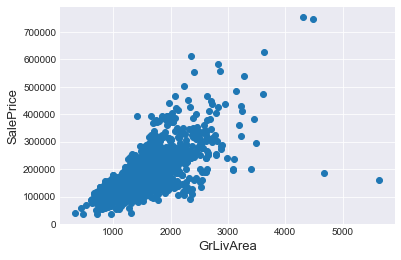

In [70]:
fig, ax = plt.subplots()
ax.scatter(x = train['GrLivArea'], y = train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

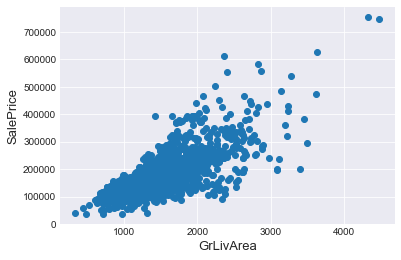

In [71]:
#Deleting outliers
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<250000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(train['GrLivArea'], train['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()

In [72]:
numeric_feats = houseprice.dtypes[houseprice.dtypes != "object"].index

# Check the skew of the numerical features
skewed_feats = houseprice[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
Condition2_RRAn,54.000
Exterior1st_ImStucc,54.000
RoofMatl_Membran,54.000
MiscFeature_TenC,54.000
RoofMatl_Roll,54.000
Condition2_RRAe,54.000
RoofMatl_ClyTile,54.000
RoofMatl_Metal,54.000
Utilities_NoSeWa,54.000
Electrical_Mix,54.000


In [73]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    houseprice[feat] = boxcox1p(houseprice[feat], lam)
    
#all_data[skewed_features] = np.log1p(all_data[skewed_features])

There are 224 skewed numerical features to Box Cox transform


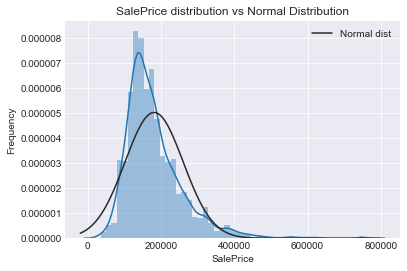

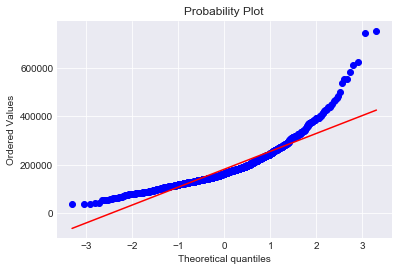

In [74]:
sns.distplot(train['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
#(mu, sigma) = norm.fit(train['SalePrice'])
#print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution vs Normal Distribution')


fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

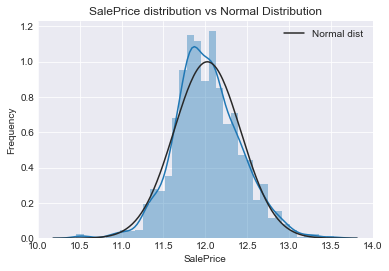

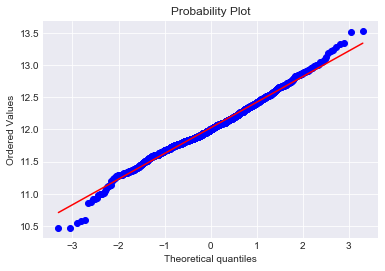

In [75]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])

#Check the new distribution 
sns.distplot(train['SalePrice'] , fit=norm);


plt.legend(['Normal dist'],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution vs Normal Distribution')


fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [76]:
#Separate train dataset and test dataset
train = houseprice[:train_len]
test = houseprice[train_len:]
test.drop(labels=["SalePrice"],axis = 1,inplace=True)

In [77]:
def show_missing2():
    missing = test.columns[test.isnull().any()].tolist()
    return missing
test[show_missing2()].isnull().sum()

Series([], dtype: float64)

In [78]:
def show_missing3():
    missing = train.columns[train.isnull().any()].tolist()
    return missing
train[show_missing3()].isnull().sum()

Series([], dtype: float64)

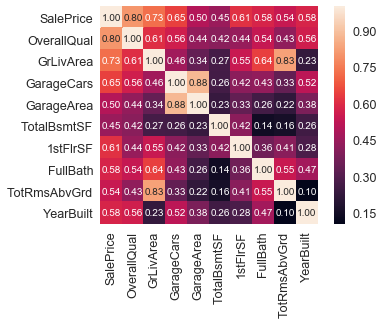

In [79]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

## Modeling starts here!!

This is a cross validation function that will yield the results by splitting the dataset into 5 parts and cross validating the data within them and then yielding a result from the model used. This will be the way in which I will test the models and decide which one is the best one to use for predictions and to finally upload to the kaggle competition. 

As far as the order of the models, this will be the way in which I will work them out. 

Random Forest

In [80]:
y = train['SalePrice']
X = train
X_test = train
tX = test

#### Model Comparisson Function

With this function, we can see how good the fit is and how well we are doing across models. It will easily and quickly compare the models across. It is pretty cool since it is doing some cross validation with 5 different iterations on the train set (hence I need to pass the full training dataset) and then showing the mean of the RMSE and the standard deviation between each of them. So, it will show how precise the estimation is, across each one of the validations as well as how each one of the models are performing.

In [81]:
n_folds = 5
#this is X is FULL DATASET!!!!!
def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [82]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import SGDRegressor
import xgboost as xgb
import lightgbm as lgb
import collections
import math

#### First Model: Random Forest Regressor

There are several reasons why I decided to start with the random Forest Regressor, the main one is probably because this was the last topic discussed in class and therefore I still have it fresh. It is also an easy and "quick" way to get a basis estimate and therefore create a benchmark to what the values that I should be expecting from the other models. The main pitfall/assumption of Random Forest is that it estimates the importance of variables when variables are multicolinear across multi-dimensional statistical space. It also heavily relies on the size, consistency and equal representatin of the sample used. This is highly debetable in this case, I am using 30% of the training dataset as my test for iterations. I think this is a good ration, especially when there are several iterations of the same calculations in trying ot optimize the result.

The results will serve as a baseline and a way to measure and compare the results from different models.

In [83]:
dataset_preprocessed = houseprice
train_preprocessed = train
test_preprocessed = test

Var_1, X_test, var_2, var_3 = train_test_split(train_preprocessed, y, test_size=0.3, random_state=0)

rmse_est = {}
for est in range(360,550,20):
    model = RandomForestRegressor(n_estimators=est, n_jobs=-1)
    model.fit(train, y)
    predictions = np.array(model.predict(X_test))
    rmse = math.sqrt(np.mean((np.array(var_3) - predictions)**2))
    imp = sorted(zip(X.columns, model.feature_importances_), key=lambda tup: tup[1], reverse=True)
    print ("RMSE: {0} - est: {1}".format(str(rmse), est))
    rmse_est[rmse]= est

RMSE: 0.031801840593450245 - est: 360
RMSE: 0.030084379216402127 - est: 380
RMSE: 0.02938035016028656 - est: 400
RMSE: 0.027486282572201173 - est: 420
RMSE: 0.02763070315907147 - est: 440
RMSE: 0.029831841125371992 - est: 460
RMSE: 0.03206877457921154 - est: 480
RMSE: 0.028172615390435 - est: 500
RMSE: 0.028117576018482426 - est: 520
RMSE: 0.028083432505851144 - est: 540


#### SGD Regression

As I typed this regression, it would have been interesting to see how different the results for this linear regression would have been before and after treating the data. This would prrof the power of data handling and show whether on the margin changing a couple of variables and filling up empty values would actually make a big difference. This however is not the purpose of this Project. 

I chose to run a Linear regression, because as an economist this would be almost my first instict. I am aware of its many shortcommings, especially after log transforming the data. Because of the limitations of a simple linear regression, I used the SGD instead, which also attempts to fit linear models. It is particularly useful when the number of samples (and the number of features) is very large. The partial_fit method allows only/out-of-core learning. The classes SGDClassifier and SGDRegressor provide functionality to fit linear models for classification and regression using different (convex) loss functions and different penalties.

The result I got was very surprising, I had to double check to make sure I was not doing anything wrong, and it made me very skeptical that I am overfitting my values for the past Random Forest regression. It is also a possibility that the functional form specificatin is not well definied. A way to account for this, would be to plot the sales data againt one of its very correlated variables and try to come up with a better functional form that would catch the movement of the data.

In [84]:
linear_regression_model = SGDRegressor(tol=.0001, eta0=.01)
linear_regression_model.fit(train.values, y)
predictions = linear_regression_model.predict(train)
mse = mean_squared_error(y, predictions)
print("RMSE: {}".format(np.sqrt(mse)))

RMSE: 685424569107.5935


#### Lasso

This is a linear model that estimates sparse coefficients. It is useful in some contexts due to its tendency to prefer solutions with fewer parameter values, effectively reducing the number of variables upon which the given solution is dependent. Thanks to this, it tends to heavily rely on just a couple of variables that are heavily correalted with the value to predict. In this case, as shown above in the heatmap, I showed that there is not a great variation of correlation between the variables and the y. We also have a good number of variables, which makes it counter intuitive to use a solution that does well in scenarios with less variables.

As part of trial and error (I guess) I ran this model and was verysurprised with the results. which led me to believe that either I am interpreting the model wrong, or I did some coding wrong. Given that I got the same result for the 5 CV (STD = 0). with a very low RMSE.

This could also be the flipside, where there are variables that are performing well and I am not giving them enough credit for it. in performing and using this model it is important to point out that the alpha parameter controls the degree of sparsity of the coefficients estimated. Therefore, I might be putting too little weight on it.

(Update) as I play around more with this (alpha) variable, I can see how I am overfitting and getting a misleading answer. This does not surprise me, it still was a good try and a way to prove how the model performed.

In [85]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [86]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))


Lasso score: 0.0007 (0.0000)



#### Elasticity Net
 
The Elasticity net is a lso a linear regression model. This combination allows for learning a sparse model where few of the weights are non-zero like Lasso, while still maintaining the regularization properties of Ridge. We control the convex combination of L1 and L2 using the l1_ratio parameter.
Elastic-net is useful when there are multiple features which are correlated with one another. Lasso is likely to pick one of these at random, while elastic-net is likely to pick both.
A practical advantage of trading-off between Lasso and Ridge is it allows Elastic-Net to inherit some of Ridge’s stability under rotation.
The objective function to minimize is in this case


In [87]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [88]:
score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

ElasticNet score: 0.0008 (0.0000)



### Kernel Ridge Regression:

This is a combination of the with the kernel trick (to separate and define a space without knowing the full transformation of the underlying function). It learns a linear function in the space induced by the respective kernel and the data. For non-linear kernels, this corresponds to a non-linear function in the original space. In this type of data, I find it useful as I have no idea what the underlying distribution for all the variables is (if I knew it I would attempt to solve with through an MLE estimator, which would be more precise, but it requests for the distribution of the data.
Because of the underlying process that takes place with the Kernel Ridge Regression, even when using Grid-search it is still able to optimize for time and deliver results much faster than other alternative methods, such as Support Vector Regression (SVR).

In [89]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [90]:
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.0428 (0.0033)



### Gradient Boosted Regression

This type of regrression is especially good for classification problems, which produces a prediction model in the form of an ensemble of weak prediction models, typically decision trees. As it goes through various iterations of the same problem, it iterates though a learning process. Similar to other regression techniques, it is able to receive various parameters that will end up making this a very taylored regression for any specific problem.

I am using this regression in the typical way, I am not tayoring this function too much, since it ussually yields lower estimates, especially without more information about the underlying distribution of the variables.

In the same fashion as other regression models, this can be easily overfit for the values. So I was conservative and did not change the parameters much from the standard example found on a kernel.

In [91]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [92]:
score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 0.4711 (0.0654)



### XGB Regression

XGB Regression is a nother great option for predicting values. In my opinion, it has a much more robust characteristics, such as the parameters in receives (learning rate, subsample, weights) this helps it gain some confidence over many other regression types. Before running XGboost, we must set three types of parameters: general parameters, booster parameters and task parameters. General parameters relates to which booster we are using to do boosting, commonly tree or linear model. In this case we will use the standard characteristics for such a regression. Another variable is the Learning Task parameters, which decides on the learning scenario, for example, regression tasks may use different parameters with ranking tasks.

What I find attractive about the XGB, and something I am not taking too much advantage in this case of, is the way that it is able to be customized and fitted to some very specific values. It also gives me confidence that those specifications will work well on other datasets, however like any other regression I have to be careful not overfit to the values.


In [93]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [94]:
score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Xgboost score: 0.2391 (0.0241)



### Light LGB Regression

Light GBM is a gradient boosting framework that uses tree based learning algorithm. It is unique in the way that Light GBM grows tree vertically while other algorithm grows trees horizontally meaning that it grows tree leaf-wise while other algorithm grows level-wise. It will choose the leaf with max delta loss to grow.

In this example I didn't change much of the standard example from the given documentation. From what we learned in class, I really liked trees for their simplicity and the way that they are able to explain complex problems into much easier tasks. The pitfall, is that even though they are highly customizable, they are not as robust as other methods.

In [95]:
model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

In [96]:
score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))

LGBM score: 0.3922 (0.0465)



### Average models

Average model is exactly what it sounds, it takes several models and running each one of them adn then clones and compares them and takes the mean of the sum of all the results. 

PROS: you dont have to "choose" a single model. Rather you are able to plug the models you feel most confident in and then get a prediction given those models. In a way you are hedging your bets and putting all your money in 3/4 models rather than one.

CONTRA: Whats bad about this, is that when there is a model that is not doing great, it could affect the other ones without much notice. So hedging your bets comes at a pretty high cost, that you might be affecting more than helping you. This is not frequently used in professional practice (as far as my research), but it might help boost the predictory power by some decimals.

In this case I am using to iluustrate the possibilty tht it can be used and that it is a possibility.

In [97]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)   

In [98]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1191 (0.0152)



In [99]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [100]:
train = train.drop('SalePrice', axis=1)

In [101]:
model_xgb.fit(train, y)
xgb_train_pred = model_xgb.predict(train)
xgb_pred = np.expm1(model_xgb.predict(test))
print(rmsle(y, xgb_train_pred))

0.155189149218


In [102]:
model_lgb.fit(train, y)
lgb_train_pred = model_lgb.predict(train)
lgb_pred = np.expm1(model_lgb.predict(test.values))
print(rmsle(y, lgb_train_pred))

0.450050257762


stacked_averaged_models.fit(train.values, y)
stacked_train_pred = stacked_averaged_models.predict(train.values)
stacked_pred = np.expm1(stacked_averaged_models.predict(test.values))
print(rmsle(y, stacked_train_pred))

In [103]:
print('RMSLE score on train data:')
print(rmsle(y, xgb_train_pred*.50 + lgb_train_pred*.50 ))

RMSLE score on train data:
0.289630068269


### Final thoughts

At the end of the day of exploring the world of options of possible regression techniques (and there is meven moer!) I decided to use a weighted model of the LGB and XGB (weighting both of them equally). This would in a way create a weighting model, but only with 2 models and giving both of them equal weight. The reason I decided to go with these 2 models is becuase the way they handles Bias and the underlying assumptions that they make in order to predict values. As I thought about a regression to "Rule them All", I realize that these 2 models were the most sophisticated. Other models might have yielded better results, but I strongly believe that they were overfitting the data and that there are other problems that the data is not showing at the motment, but if. I were to use a differnet train/test dataset with the same specification it would not perform as well as it has done in the previous dataset.


In [104]:
ensemble = xgb_pred*.75 + lgb_pred*.25

In [105]:
sub = pd.DataFrame()
sub['Id'] = test_ID
sub['SalePrice'] = ensemble
sub.to_csv('submission.csv',index=False)

### Thanks!

If you liked this kernel or found it useful in any way, please comment and I'll reply.
Grader, if you liked it enough for a good grade that is also appreciated it.